This is for checking the confidence of the model. The codes are modified from `machine_confidence.ipynb`.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plt.style.use('ggplot')
plt.style.use('seaborn-paper')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Create probability data

In [ ]:
from wasafacies import PrepareData, Split
from joblib import load

prepare = PrepareData()
facies, id_list = prepare.create_recla()

data_df = prepare.create_roll(facies=facies, id_list=id_list)

X = data_df.iloc[:, :-2].values
y = data_df['facies'].values
groups = data_df['core_section'].values
train_idx, test_idx = Split.train_test_split(y, groups)

model = load('models/r_roll_lr_model_20220120.joblib')

y_df = pd.DataFrame(
    {
        'y': y[test_idx],
        'y_roll': model.predict(data_df.iloc[test_idx, :-2]),
        'core_section': groups[test_idx]
    }, index = data_df.index[test_idx]
)

In [ ]:
y_df = pd.DataFrame(
    {
        'y': y[test_idx],
        'y_roll': model.predict(data_df.iloc[test_idx, :-2]),
        'core_section': groups[test_idx]
    }, index = data_df.index[test_idx]
)

In [ ]:
y_df.shape

(3766, 3)

In [ ]:
depth = pd.read_csv('data/info.cleaned.all.csv', index_col=0, 
                      usecols=['composite_id', 'section_depth_mm'],
                      squeeze=True)


In [70]:
from wasafacies import Evaluation
Facies = Evaluation().get_Facies()

In [ ]:
proba_df = pd.DataFrame(
    model.predict_proba(data_df.iloc[test_idx, :-2]), 
    index=data_df.index[test_idx],
    columns=Facies)
proba_df

,hsm,hcf,lcf,sf,mf,la,pt,so,pm,pef,mo
composite_id,,,,,,,,,,,
N11_02961,0.000468,0.002741,0.075020,0.001929,0.056910,0.760230,0.007282,0.006656,0.013772,0.007845,0.067148
N11_02963,0.000432,0.002671,0.073234,0.001847,0.058545,0.762869,0.006963,0.006327,0.013486,0.007232,0.066395
N11_02965,0.000352,0.002195,0.065493,0.001581,0.058573,0.774399,0.006398,0.005979,0.013209,0.007154,0.064665
N11_02967,0.000316,0.002114,0.067497,0.001444,0.077584,0.747265,0.006782,0.005519,0.015077,0.007301,0.069103
N11_02969,0.000311,0.002164,0.061435,0.001365,0.067609,0.764184,0.007051,0.005596,0.015950,0.006832,0.067502
...,...,...,...,...,...,...,...,...,...,...,...
VVC20_04719,0.023767,0.013975,0.001310,0.154835,0.014206,0.013241,0.012635,0.406817,0.095285,0.240282,0.023646
VVC20_04721,0.019832,0.014713,0.001584,0.139237,0.017275,0.014929,0.013000,0.430549,0.094033,0.227524,0.027324
VVC20_04723,0.018802,0.015540,0.001787,0.134945,0.019427,0.014760,0.013190,0.427999,0.098398,0.226396,0.028756


In [ ]:
compile_df = pd.concat(
    [y_df, depth, proba_df],
    axis=1, join='inner'
)

compile_df

,y,y_roll,core_section,section_depth_mm,hsm,hcf,lcf,sf,mf,la,pt,so,pm,pef,mo
composite_id,,,,,,,,,,,,,,,
N11_02961,4,5,N11-1,236.0,0.000468,0.002741,0.075020,0.001929,0.056910,0.760230,0.007282,0.006656,0.013772,0.007845,0.067148
N11_02963,4,5,N11-1,238.0,0.000432,0.002671,0.073234,0.001847,0.058545,0.762869,0.006963,0.006327,0.013486,0.007232,0.066395
N11_02965,4,5,N11-1,240.0,0.000352,0.002195,0.065493,0.001581,0.058573,0.774399,0.006398,0.005979,0.013209,0.007154,0.064665
N11_02967,4,5,N11-1,242.0,0.000316,0.002114,0.067497,0.001444,0.077584,0.747265,0.006782,0.005519,0.015077,0.007301,0.069103
N11_02969,4,5,N11-1,244.0,0.000311,0.002164,0.061435,0.001365,0.067609,0.764184,0.007051,0.005596,0.015950,0.006832,0.067502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VVC20_04719,9,7,VVC20-1,974.0,0.023767,0.013975,0.001310,0.154835,0.014206,0.013241,0.012635,0.406817,0.095285,0.240282,0.023646
VVC20_04721,9,7,VVC20-1,976.0,0.019832,0.014713,0.001584,0.139237,0.017275,0.014929,0.013000,0.430549,0.094033,0.227524,0.027324
VVC20_04723,9,7,VVC20-1,978.0,0.018802,0.015540,0.001787,0.134945,0.019427,0.014760,0.013190,0.427999,0.098398,0.226396,0.028756


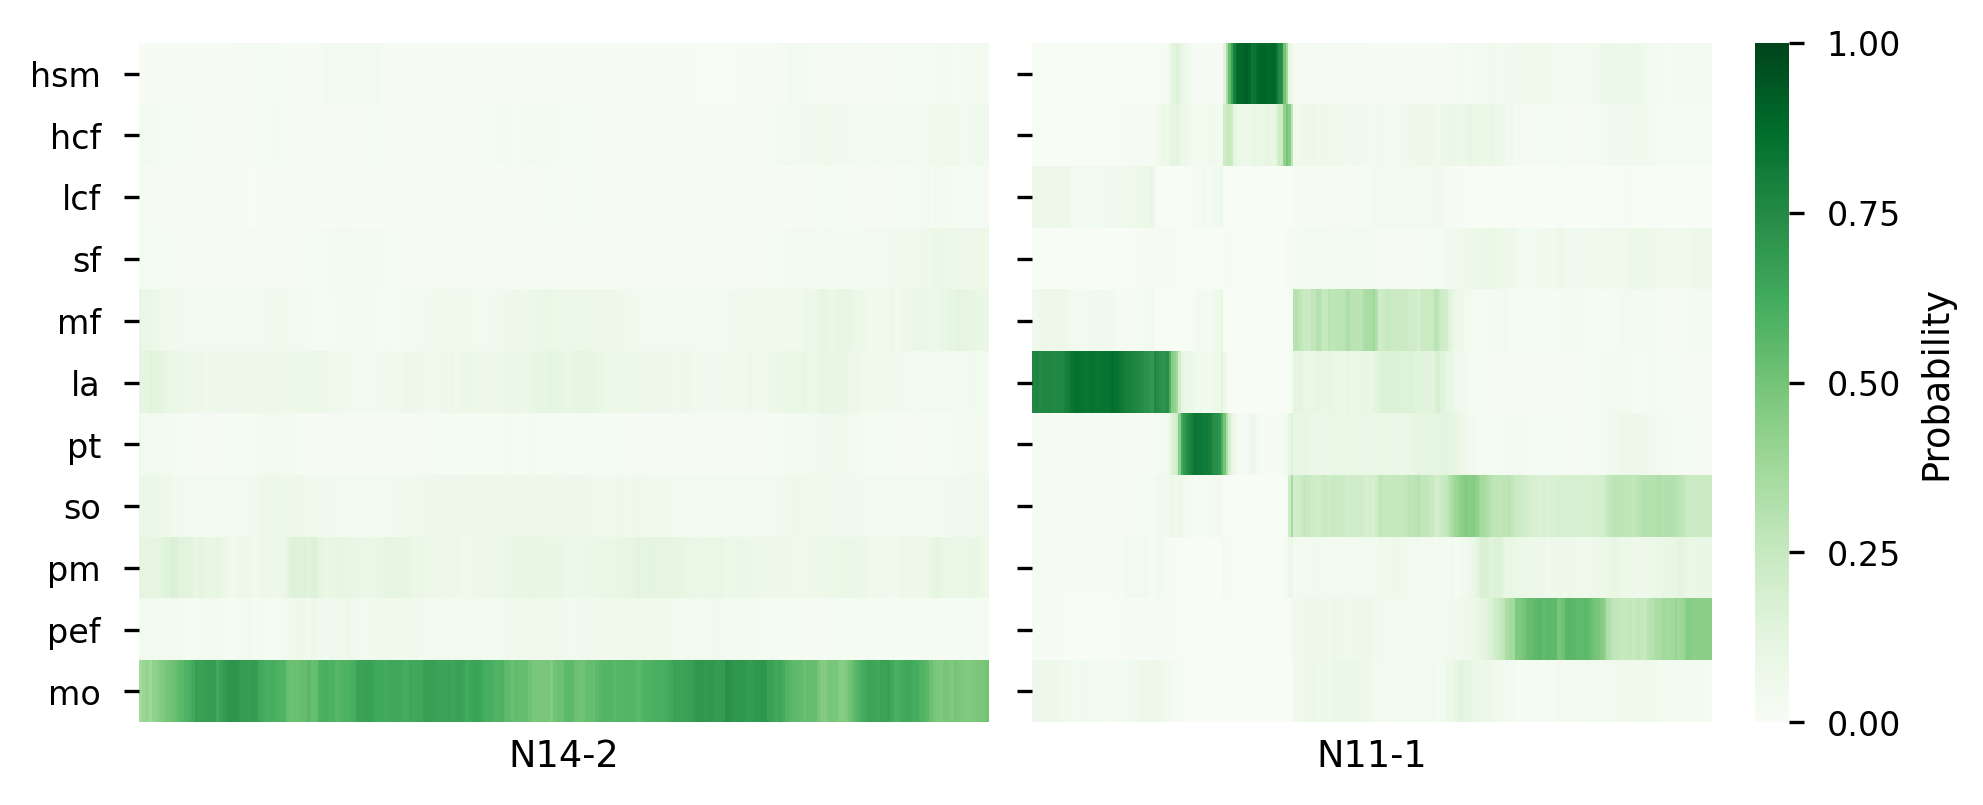

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(7.5, 3), sharey='row')
sns.heatmap(compile_df.loc[compile_df.core_section == 'N14-2', compile_df.columns[-11:]].T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[0], cbar=False)
sns.heatmap(compile_df.loc[compile_df.core_section == 'N11-1', compile_df.columns[-11:]].T, cmap='Greens', yticklabels=Facies, vmax=1, vmin=0, xticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability', 'ticks': [0, 0.25, 0.5, 0.75, 1]})
axes[0].set_xlabel('N14-2')
axes[1].set_xlabel('N11-1')
plt.subplots_adjust(wspace=.05)
#fig.savefig('results/roll_lr_probability_{}.png'.format(date))

In [ ]:
compile_df.to_csv('results/r_prob_{}.csv'.format(date))
print(date)

20220124


# Visualize the stats of probability
To see if the misclassified sediments are having multiple similar scores in different facies (i.e. the machine is hesitating). I calculate medain, std and kurtosis of the probabilities in each data point (i.e. sediment). Then I simulate their distribution (KDE) in correctly amd incorrectly classified, respectively. I don't use mean because the sum of prpobability in each facies is constant 1. The means are all the same along data points.

In [2]:
compile_df = pd.read_csv('results/r_prob_20220124.csv', index_col=0)

a.

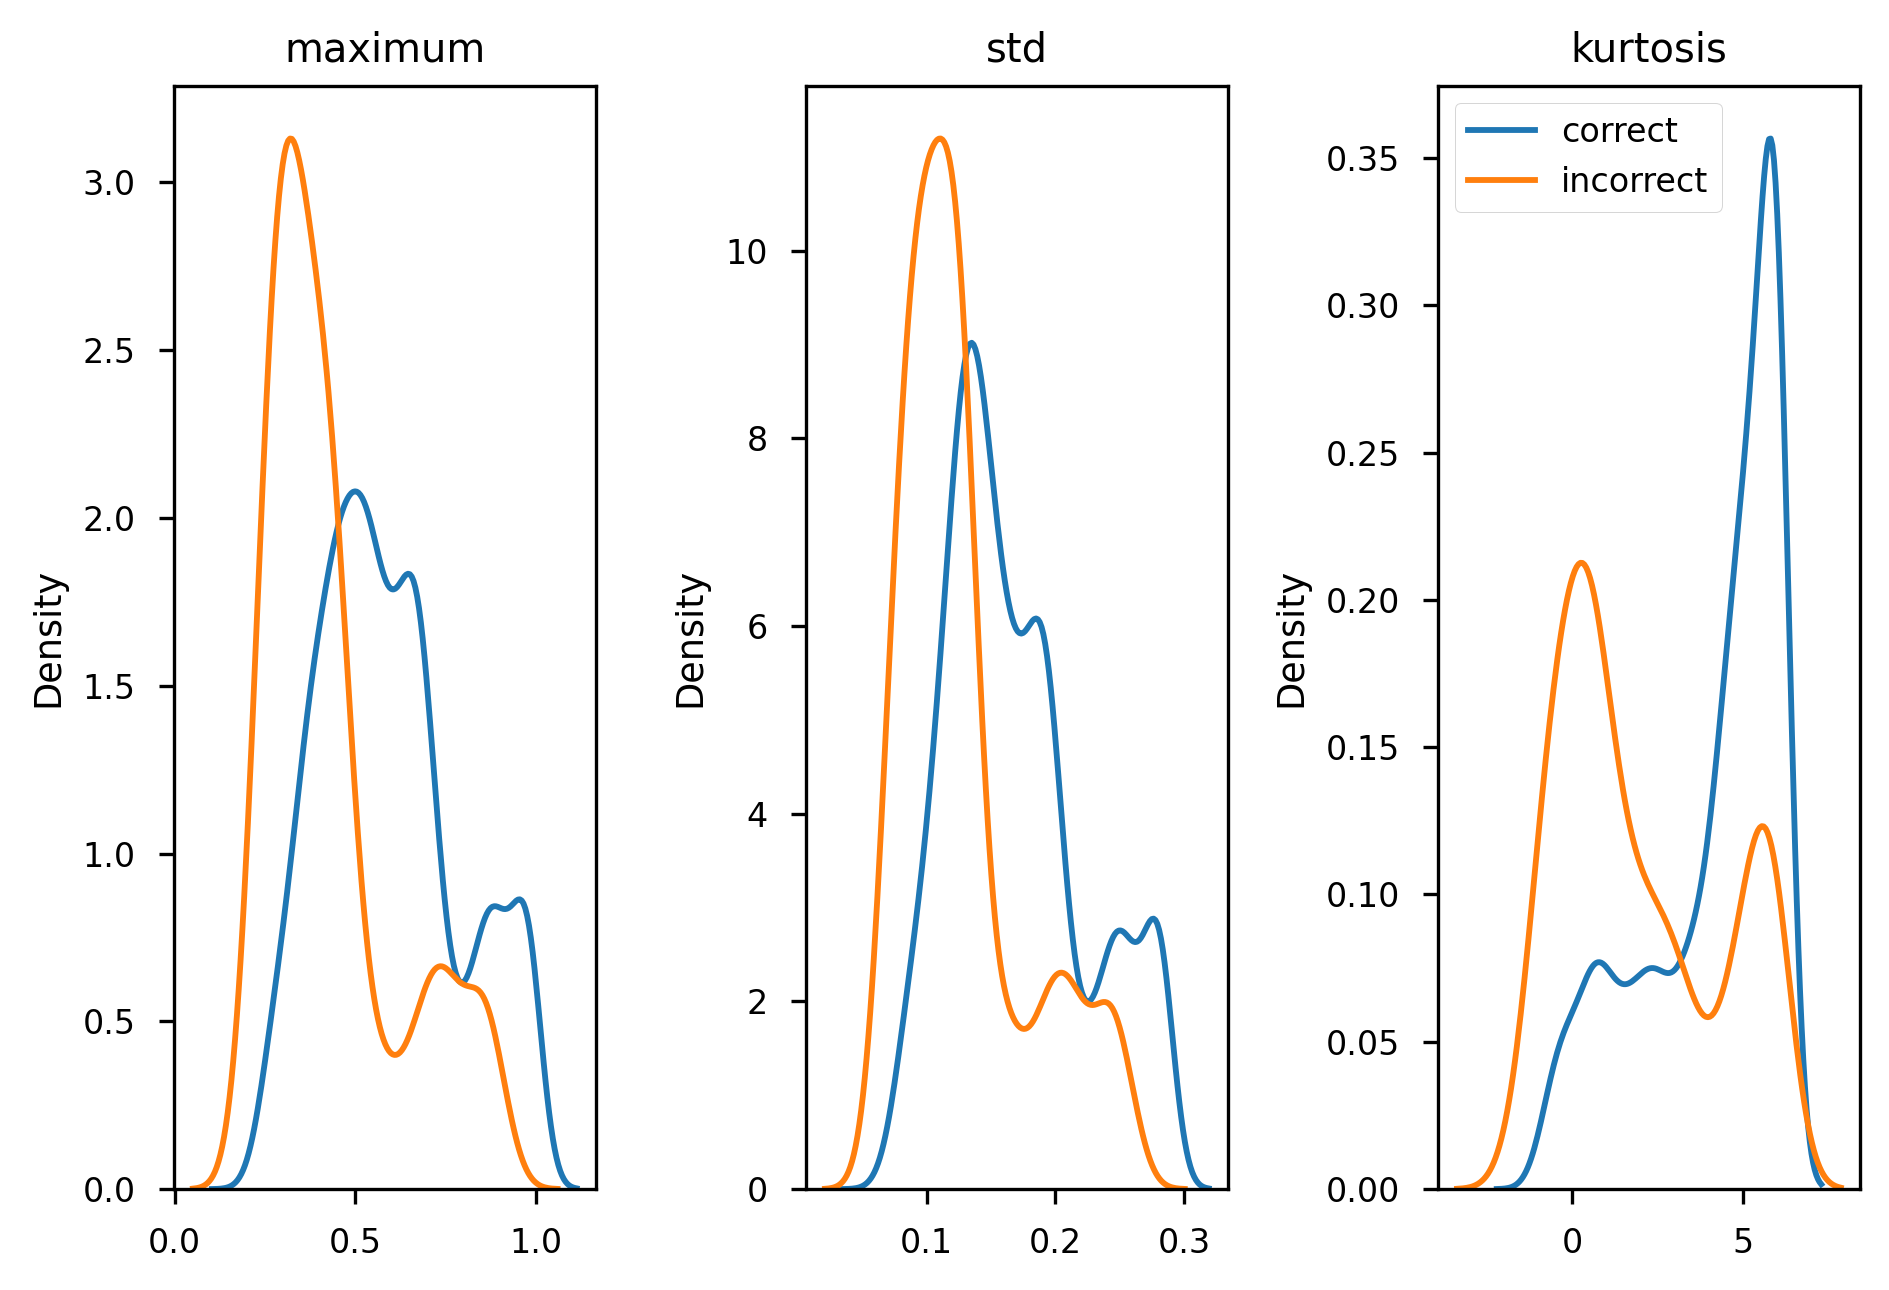

In [8]:
from scipy.stats import kurtosis
mask = compile_df.y == compile_df.y_roll
fig, axes = plt.subplots(1, 3)
for ax, alg, title in zip(axes, [np.max, np.std, kurtosis], ['maximum', 'std', 'kurtosis']):
    a1 = compile_df.loc[mask, compile_df.columns[-11:]].apply(alg, axis=1)
    a2 = compile_df.loc[~mask, compile_df.columns[-11:]].apply(alg, axis=1)
    sns.kdeplot(a1, label='correct', ax=ax)
    sns.kdeplot(a2, label='incorrect', ax=ax)
    ax.set_title(title)
ax.legend()
plt.tight_layout()

b.

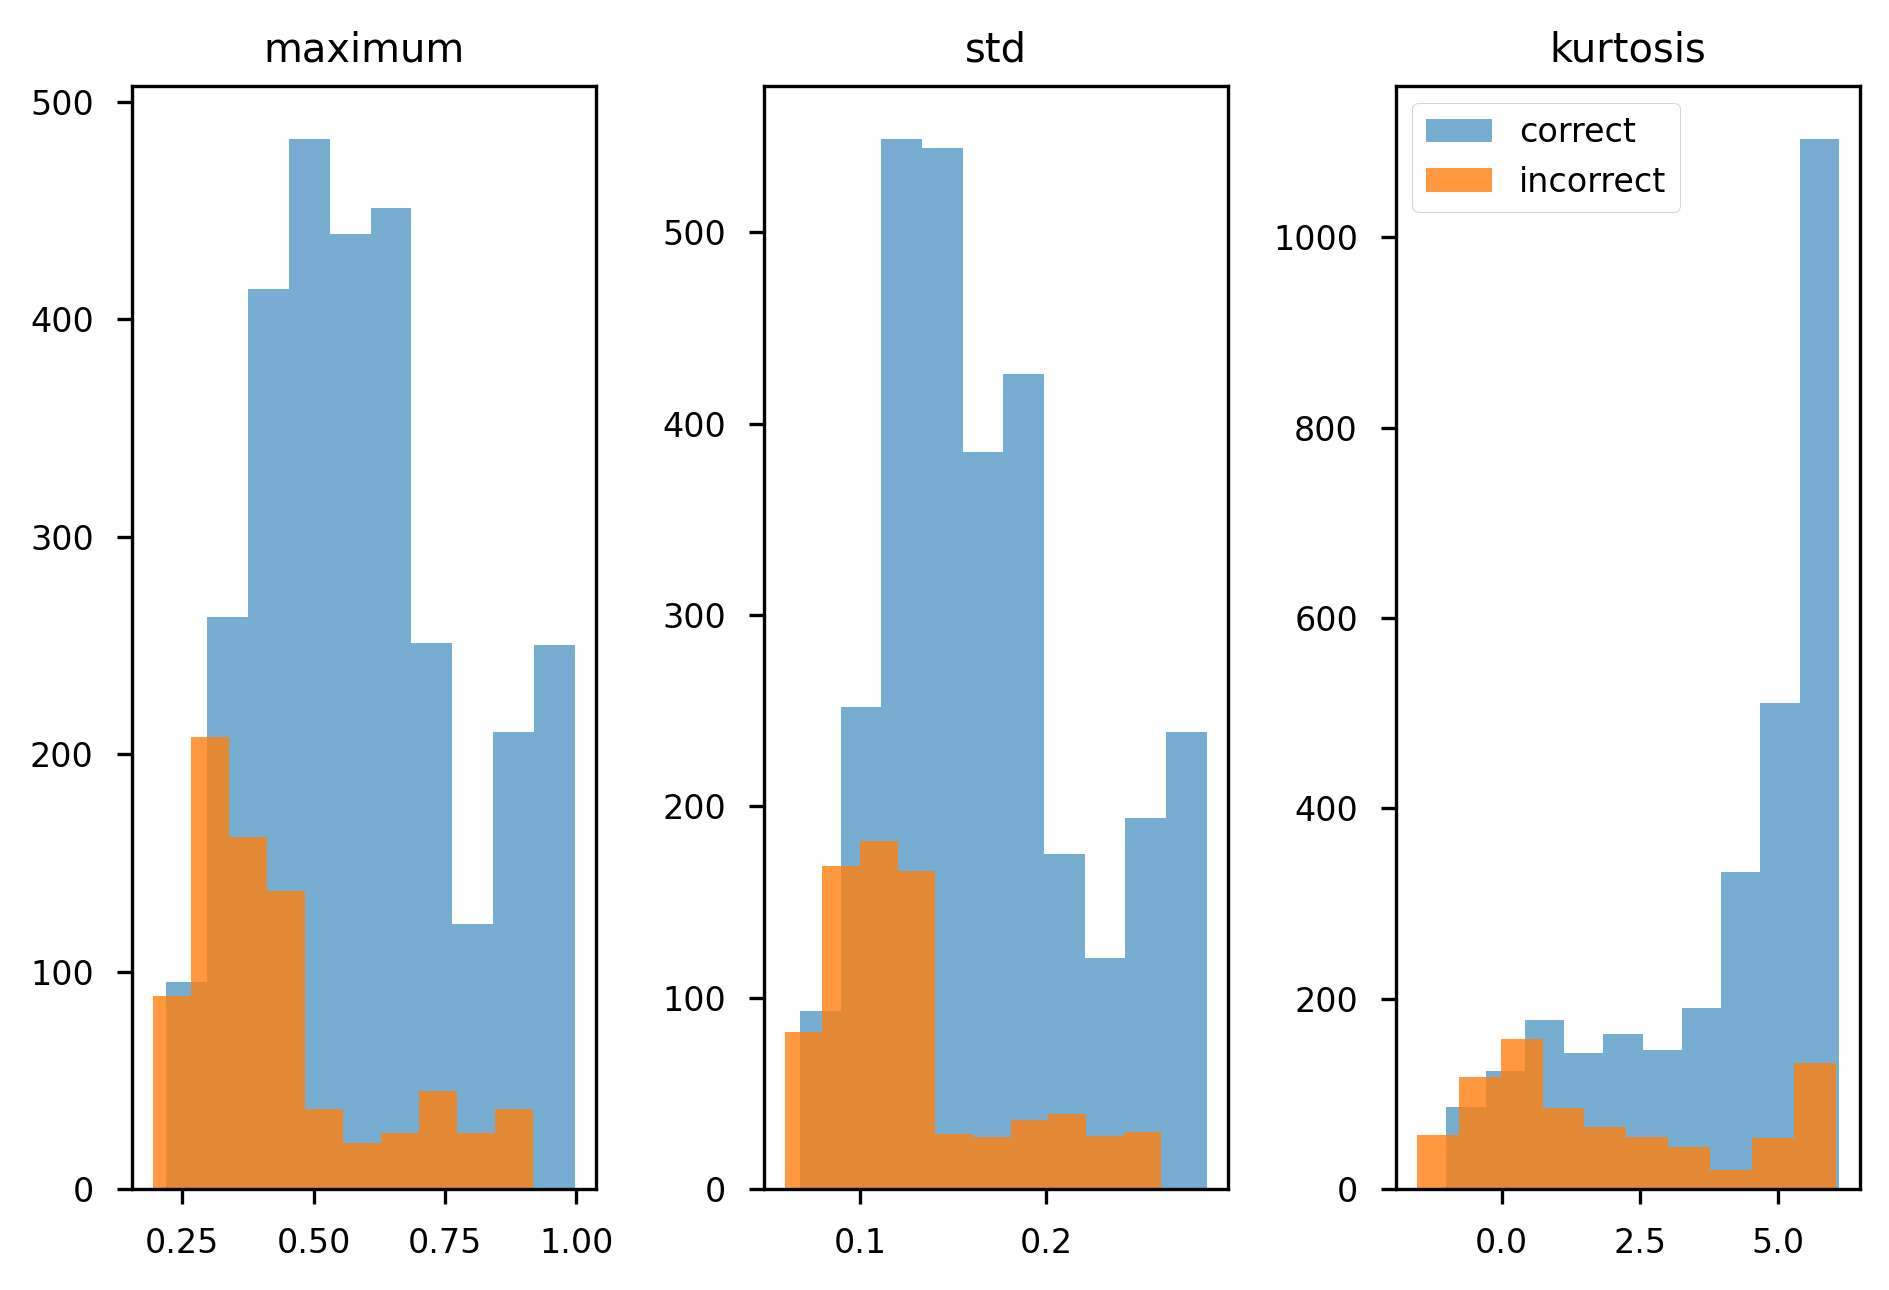

In [11]:
mask = compile_df.y == compile_df.y_roll
fig, axes = plt.subplots(1, 3)
for ax, alg, title in zip(axes, [np.max, np.std, kurtosis], ['maximum', 'std', 'kurtosis']):
    a1 = compile_df.loc[mask, compile_df.columns[-11:]].apply(alg, axis=1)
    a2 = compile_df.loc[~mask, compile_df.columns[-11:]].apply(alg, axis=1)
    ax.hist(a1, label='correct', alpha=.6)
    ax.hist(a2, label='incorrect', alpha=.8)
    ax.set_title(title)
ax.legend()
plt.tight_layout()

In [27]:
print(((cor > 0) & (cor <= .1)).sum())
print(((incor > 0) & (incor <= .1)).sum())

0
0


Okay, no maximum probability is below 0.1.

In [28]:
cor = compile_df.loc[mask, compile_df.columns[-11:]].apply(np.max, axis=1).values
incor = compile_df.loc[~mask, compile_df.columns[-11:]].apply(np.max, axis=1).values

error_rates = []

for i in range(1, 10):
    i = i*.1
    mask_cor = (cor > i) & (cor <= i+.1)
    mask_inc = (incor > i) & (incor <= i+.1)
    error_rates.append(mask_inc.sum() / (mask_cor.sum()+mask_inc.sum()))

20220124


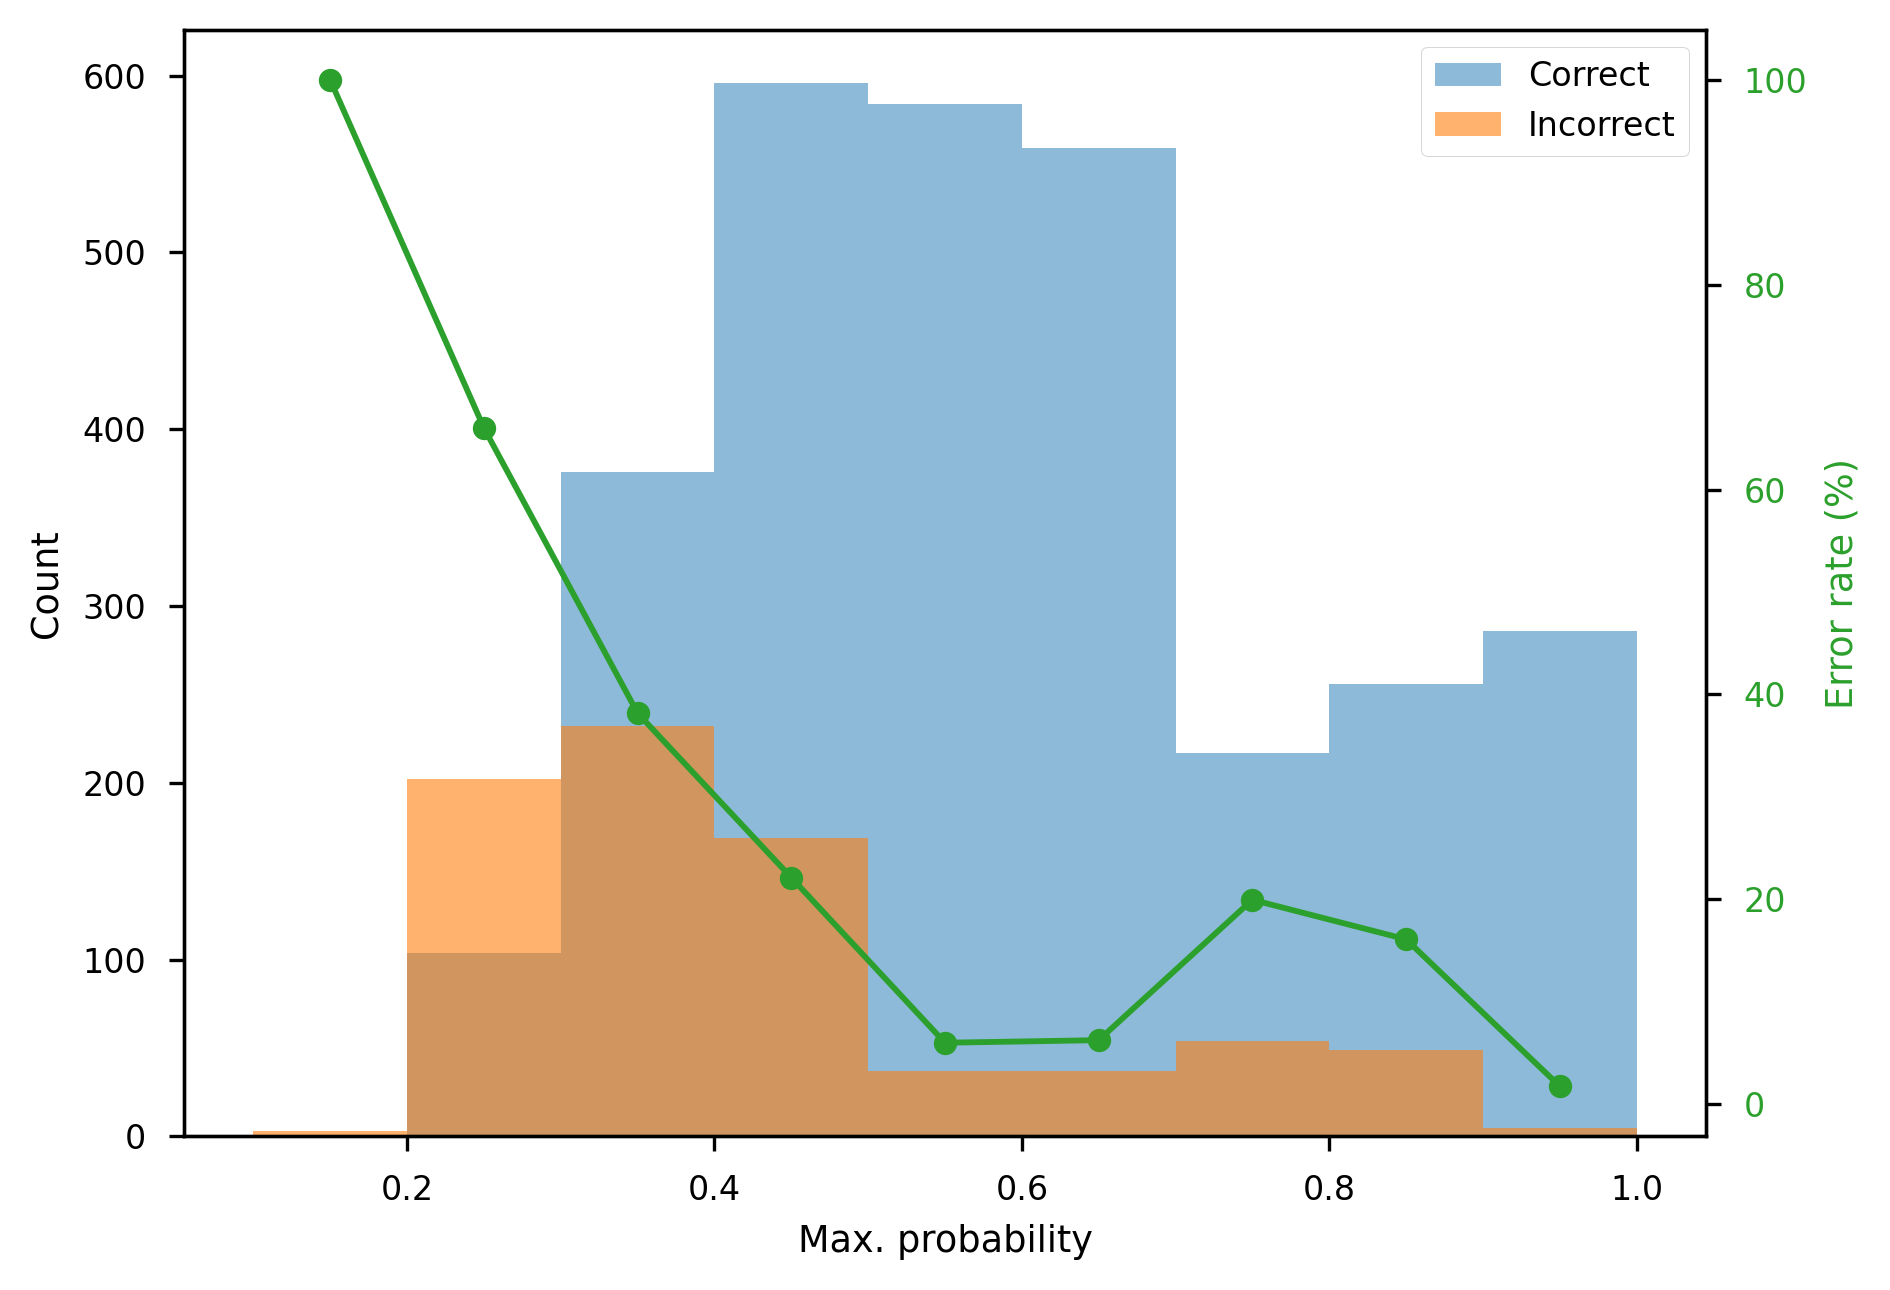

In [68]:
# histogram of the max. probability
fig, ax1 = plt.subplots()
bins = np.linspace(.1, 1.0, 10)
ax1.hist(cor, label='Correct', alpha=.5, bins=bins)
ax1.hist(incor, label='Incorrect', alpha=.6, bins=bins)
#plt.bar(np.linspace(0.15, 0.95, 9), np.array(error_rates)*100, width=.1, edgecolor='gray', linewidth=.5, alpha=.8)
ax1.legend()
ax1.set_ylabel('Count')
ax1.set_xlabel('Max. probability')

# error rate in each range of max. probability
color = 'C2'
ax2 = ax1.twinx()
ax2.plot(np.linspace(0.15, 0.95, 9), np.array(error_rates)*100, marker='o', c=color)
ax2.set_ylabel('Error rate (%)', c=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout() 

fig.savefig('results/r_test_prob_distribution_{}.png'.format(date))
print(date)

Instead of using std or kurtosis, I like to use the maximum probability in each data point as the proxy of model's "hesitation" more. It's more intuitive. We can see the incorrect predictions are dominant in the lower maximum probability values comparing to the correct predictions. We can say, when seeing value lower than 0.3, it means the model is hesitating and has good chance to have wrong prediction. I'll compare it to a demo of probability of a section.

# Demo a section

20220124


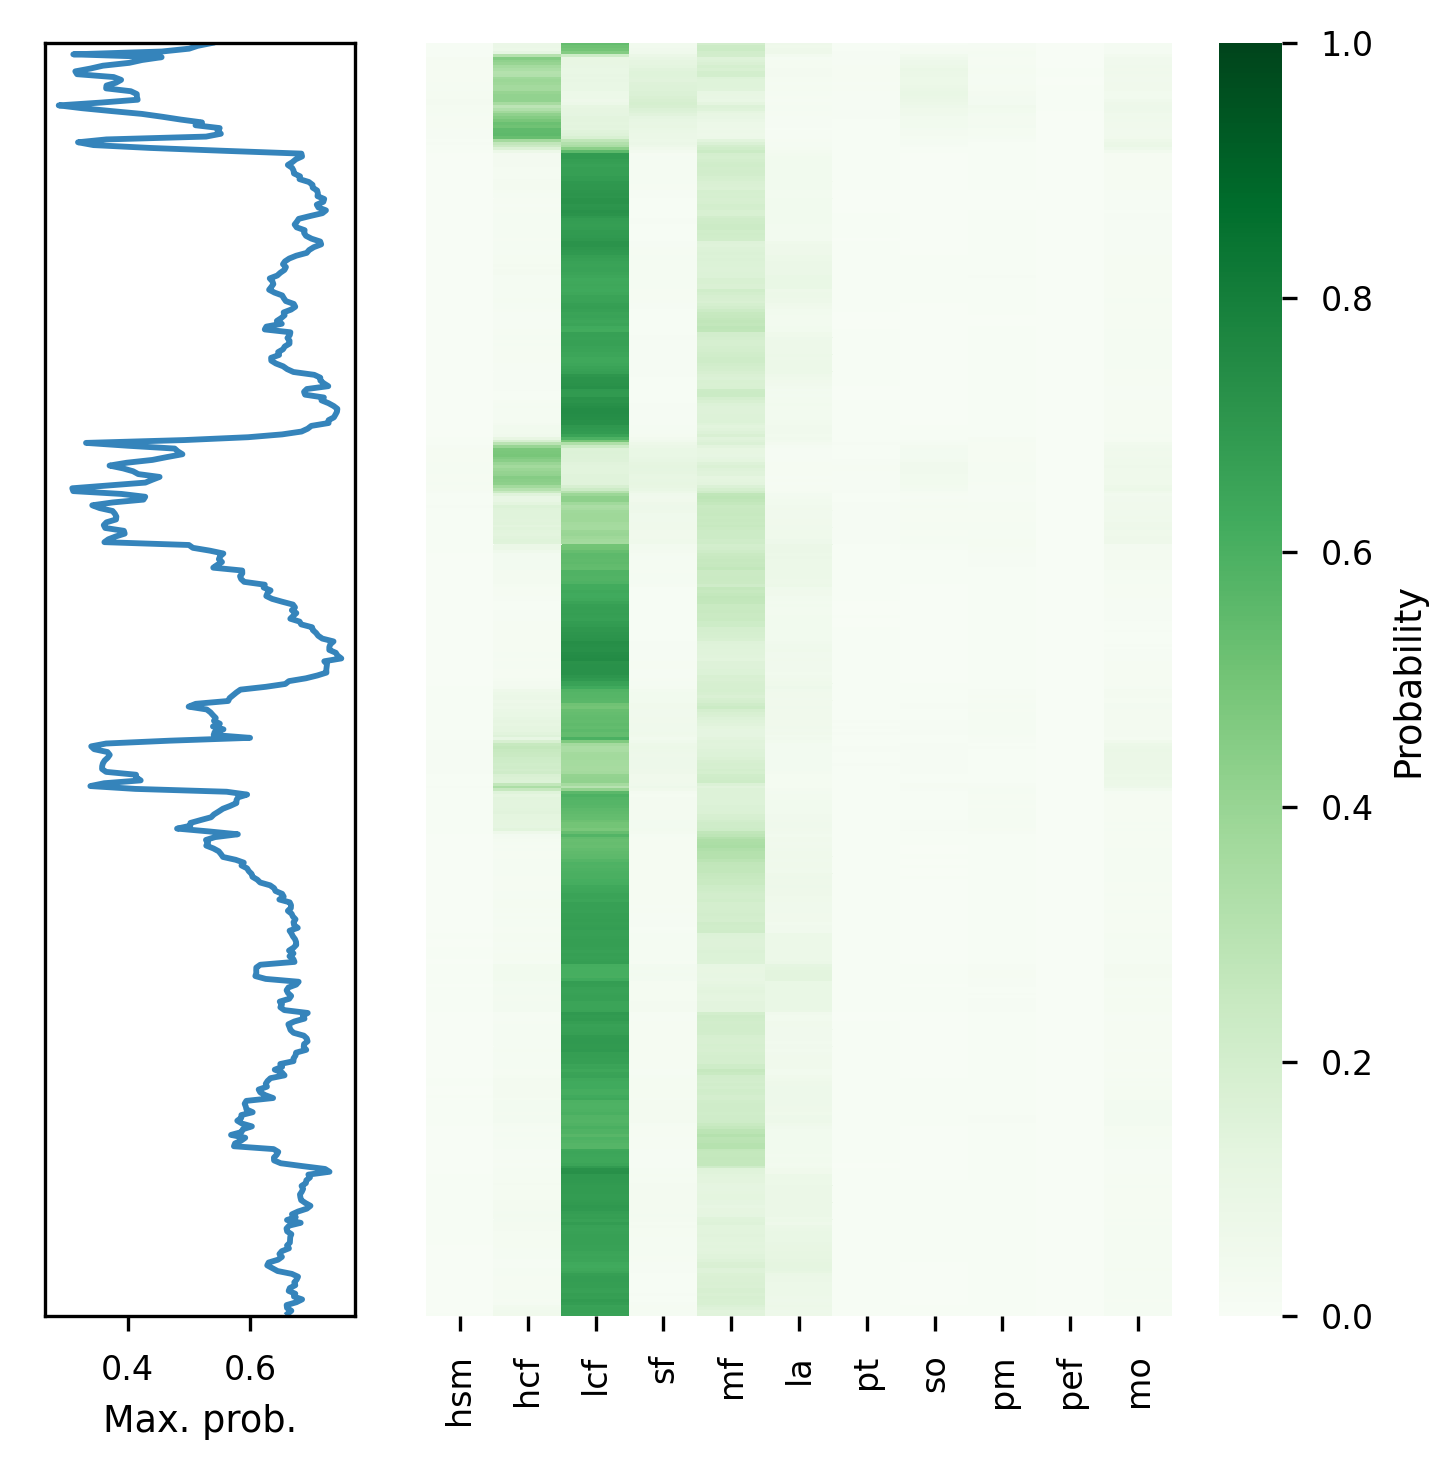

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(5, 5), sharey='row', gridspec_kw={'width_ratios': [1, 3]})
core_section = 'N31-1'
X = compile_df.loc[compile_df.core_section == core_section, compile_df.columns[-11:]]

axes[0].plot(X.apply(np.max, axis=1).values, range(len(X)), alpha=.9)
axes[0].set_xlabel('Max. prob.')

sns.heatmap(X, cmap='Greens', xticklabels=Facies, vmax=1, vmin=0, 
            yticklabels=False, ax=axes[1], 
            cbar_kws = {'label' : 'Probability', 'ticks': [0, 0.2, 0.4, 0.6, 0.8, 1]})

axes[1].set_ylabel('')


plt.tight_layout()
fig.savefig('results/r_demo_prob_roll+lr_{}_{}.png'.format(core_section, date))
print(date)